# Neural Network

We chose the neural network regression for the prediction of the demand of bikesharing rental hourly. For that Keras as well as Tensorflow will be used and should be installed. Here we use the same procedure as in the workshop 9 *neural networks for regression in keras*.

In [7]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import keras libraries

#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Data preparation

In [8]:
# Load data

df_bike_trips = pd.read_parquet("../../data/bike_trips_hourly_FINAL.parquet")
df_bike_trips.head(2)

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,month,is_weekday,season,is_holiday
index,,,,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,1,1,4,1
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,1,1,4,1


#### Define X and Y

In [9]:
# Defining inputs and output

y = df_bike_trips["starting_trips"]
X = df_bike_trips.drop("starting_trips", axis=1)

#### Train the model on the training set

In [10]:
# Adjusted test_size to 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normalizing training data

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train_scaled = st_scaler.transform(X_train)

### Initializing the ANN

In [12]:
# Defining the NN model
# Dense matches the number of features -> adjusted dense 


#Baseline Model
model = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [13]:
# Compiling the ANN

model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [15]:
epochs = 100

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 11227.3867 - mae: 75.3846 - mse: 11227.3867 - val_loss: 11489.7920 - val_mae: 77.7923 - val_mse: 11489.7920
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 11017.7783 - mae: 74.3041 - mse: 11017.7783 - val_loss: 11220.8193 - val_mae: 76.4994 - val_mse: 11220.8193
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10701.9854 - mae: 72.7650 - mse: 10701.9854 - val_loss: 10833.2666 - val_mae: 74.6993 - val_mse: 10833.2666
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10271.4717 - mae: 70.7304 - mse: 10271.4717 - val_loss: 10329.5293 - val_mae: 72.3832 - val_mse: 10329.5293
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 9745.9932 - mae: 68.2633 - mse: 9745.9932 - val_loss: 9746.3789 - val_mae: 69.6934 - val_mse: 9746.3789
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 9155.5801 - ma

163/163 [==============================] - 0s 1ms/step - loss: 3180.5115 - mae: 38.7059 - mse: 3180.5115 - val_loss: 3073.7649 - val_mae: 38.1809 - val_mse: 3073.7649
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 3146.9985 - mae: 38.4107 - mse: 3146.9985 - val_loss: 3042.0688 - val_mae: 37.8992 - val_mse: 3042.0688
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 3114.8254 - mae: 38.1587 - mse: 3114.8254 - val_loss: 3009.9919 - val_mae: 37.6577 - val_mse: 3009.9919
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 3083.0725 - mae: 37.9445 - mse: 3083.0725 - val_loss: 2979.1987 - val_mae: 37.4216 - val_mse: 2979.1987
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 3052.7007 - mae: 37.7048 - mse: 3052.7007 - val_loss: 2949.5156 - val_mae: 37.1915 - val_mse: 2949.5156
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 3023.9133 - mae: 37.5160 - mse: 3023.

163/163 [==============================] - 0s 1ms/step - loss: 2475.8936 - mae: 34.2138 - mse: 2475.8936 - val_loss: 2383.0781 - val_mae: 33.7617 - val_mse: 2383.0781
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2469.7893 - mae: 34.1247 - mse: 2469.7893 - val_loss: 2376.7598 - val_mae: 33.6996 - val_mse: 2376.7598
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2463.6885 - mae: 34.1199 - mse: 2463.6885 - val_loss: 2371.2795 - val_mae: 33.6309 - val_mse: 2371.2795
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2458.2361 - mae: 34.0334 - mse: 2458.2361 - val_loss: 2365.0061 - val_mae: 33.6393 - val_mse: 2365.0061
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2453.2625 - mae: 34.0358 - mse: 2453.2625 - val_loss: 2359.7830 - val_mae: 33.5769 - val_mse: 2359.7830
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2447.0796 - mae: 33.9840 - mse: 2447.

In [16]:
model.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 92ms/step


array([[1.3979912e-02],
       [7.7024946e+00],
       [1.7668190e+02],
       [9.5163696e+01],
       [6.8309647e+01],
       [1.5810716e+02],
       [1.9369816e+01],
       [9.7626411e+01],
       [8.9960030e+01],
       [1.3914357e+02]], dtype=float32)

In [17]:
df_history = pd.DataFrame(history.history)
df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11227.386719,75.384605,11227.386719,11489.791992,77.792320,11489.791992
1,11017.778320,74.304070,11017.778320,11220.819336,76.499382,11220.819336
2,10701.985352,72.764992,10701.985352,10833.266602,74.699318,10833.266602
3,10271.471680,70.730354,10271.471680,10329.529297,72.383194,10329.529297
4,9745.993164,68.263329,9745.993164,9746.378906,69.693420,9746.378906
...,...,...,...,...,...,...
95,2447.079590,33.984013,2447.079590,2354.186523,33.534019,2354.186523
96,2441.994141,33.888821,2441.994141,2349.260010,33.491501,2349.260010
97,2436.944580,33.909382,2436.944580,2344.302490,33.483009,2344.302490
98,2431.886230,33.855030,2431.886230,2339.590088,33.438560,2339.590088


In [18]:
df_root_metrics = df_history[["mse", "val_mse"]].apply(np.sqrt)
df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
df_root_metrics

,rmse,val_rmse
0,105.959364,107.190447
1,104.965605,105.928369
2,103.450400,104.082979
3,101.348269,101.634292
4,98.721797,98.723750
...,...,...
95,49.467965,48.519960
96,49.416537,48.469166
97,49.365419,48.417998
98,49.314159,48.369309


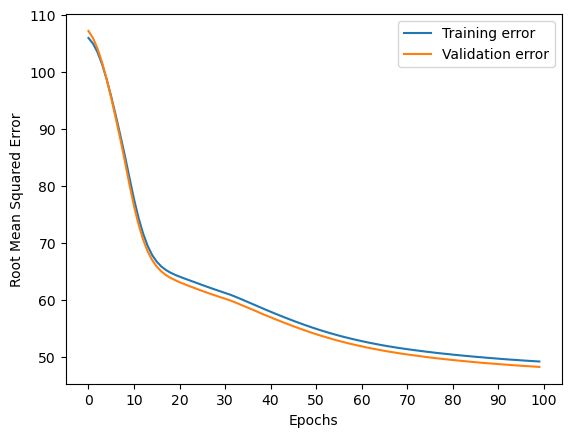

In [19]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(df_root_metrics["rmse"], label = 'Training error')
plt.plot(df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [20]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

51/51 [==============================] - 0s 721us/step


In [21]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

#There are many metrics that can be used to evaluate the performance of a neural network regression model. Some common metrics include:

#Mean absolute error (MAE) - This measures the average distance between the predicted values and the true values.
#Mean squared error (MSE) - This measures the average squared difference between the predicted values and the true values.
#Root mean squared error (RMSE) - This is the square root of the MSE, and it is often used because it is in the same units as the original data.
#R-squared - This is a measure of the degree to which the model's predictions explain the variance in the target variable. It ranges from 0 to 1, with higher values indicating better fit.
#Other metrics that may be used to evaluate the performance of a neural network regression model include mean absolute percentage error (MAPE), mean squared logarithmic error (MSLE), and relative absolute error (RAE). Which metric is most appropriate to use depends on the specific requirements of the application and the goals of the model.

MAE: 33.64
MSE: 2242.95
MAPE: 44.21%
RMSE: 47.36


## Alternative activation functions

In [22]:
# Define sigmoid model
model_sigmoid = Sequential(
    [Dense(X_train.shape[1], activation="sigmoid", input_shape=[X_train.shape[1]]),
     Dense(1)])

# Define hyperbolic tangent (tanh) model
# model_tanh = Sequential(
#     [Dense(X_train.shape[1], activation="tanh", input_shape=[X_train.shape[1]]),
#      Dense(1)])

In [23]:
model_sigmoid.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [24]:
model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_sigmoid = model_sigmoid.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 11111.4443 - mae: 74.6657 - mse: 11111.4443 - val_loss: 11378.8682 - val_mae: 77.0906 - val_mse: 11378.8682
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10944.9502 - mae: 73.7151 - mse: 10944.9502 - val_loss: 11201.1348 - val_mae: 76.1293 - val_mse: 11201.1348
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10773.3623 - mae: 72.7640 - mse: 10773.3623 - val_loss: 11021.1104 - val_mae: 75.1548 - val_mse: 11021.1104
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10599.5039 - mae: 71.7992 - mse: 10599.5039 - val_loss: 10836.5703 - val_mae: 74.1584 - val_mse: 10836.5703
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 10416.4951 - mae: 70.7877 - mse: 10416.4951 - val_loss: 10639.8643 - val_mae: 73.1090 - val_mse: 10639.8643
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 10222.6670

163/163 [==============================] - 0s 1ms/step - loss: 5173.0708 - mae: 45.8272 - mse: 5173.0708 - val_loss: 5180.6387 - val_mae: 47.0838 - val_mse: 5180.6387
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 5105.4351 - mae: 45.5497 - mse: 5105.4351 - val_loss: 5108.3633 - val_mae: 46.7600 - val_mse: 5108.3633
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 5039.8403 - mae: 45.2749 - mse: 5039.8403 - val_loss: 5037.8203 - val_mae: 46.4371 - val_mse: 5037.8203
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 4976.2070 - mae: 44.9727 - mse: 4976.2070 - val_loss: 4970.0684 - val_mae: 46.1241 - val_mse: 4970.0684
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 4914.0801 - mae: 44.7227 - mse: 4914.0801 - val_loss: 4903.6587 - val_mae: 45.8219 - val_mse: 4903.6587
Epoch 51/100
163/163 [==============================] - 0s 2ms/step - loss: 4853.8325 - mae: 44.4601 - mse: 4853.

163/163 [==============================] - 0s 1ms/step - loss: 3657.8608 - mae: 40.7667 - mse: 3657.8608 - val_loss: 3492.0266 - val_mae: 40.5813 - val_mse: 3492.0266
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 3645.0264 - mae: 40.7525 - mse: 3645.0264 - val_loss: 3475.7319 - val_mae: 40.5256 - val_mse: 3475.7319
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 3632.1592 - mae: 40.7020 - mse: 3632.1592 - val_loss: 3460.9797 - val_mae: 40.4654 - val_mse: 3460.9797
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 3619.4954 - mae: 40.6814 - mse: 3619.4954 - val_loss: 3445.6077 - val_mae: 40.4109 - val_mse: 3445.6077
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 3606.4138 - mae: 40.6354 - mse: 3606.4138 - val_loss: 3431.0608 - val_mae: 40.3526 - val_mse: 3431.0608
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 3593.3430 - mae: 40.6209 - mse: 3593.

In [26]:
model_sigmoid.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 57ms/step


array([[ 11.126722],
       [ 18.13692 ],
       [108.000626],
       [ 94.77509 ],
       [ 75.9278  ],
       [108.004845],
       [ 17.379826],
       [103.92643 ],
       [ 97.58373 ],
       [107.991745]], dtype=float32)

In [27]:
sigmoid_df_history = pd.DataFrame(history_sigmoid.history)
sigmoid_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11111.444336,74.665710,11111.444336,11378.868164,77.090637,11378.868164
1,10944.950195,73.715111,10944.950195,11201.134766,76.129295,11201.134766
2,10773.362305,72.764023,10773.362305,11021.110352,75.154808,11021.110352
3,10599.503906,71.799217,10599.503906,10836.570312,74.158432,10836.570312
4,10416.495117,70.787735,10416.495117,10639.864258,73.109024,10639.864258
...,...,...,...,...,...,...
95,3593.343018,40.620880,3593.343018,3416.270752,40.301239,3416.270752
96,3580.307861,40.582703,3580.307861,3402.161865,40.258846,3402.161865
97,3567.508057,40.553104,3567.508057,3388.472412,40.202835,3388.472412
98,3555.417969,40.518391,3555.417969,3375.388916,40.146423,3375.388916


In [28]:
sigmoid_df_root_metrics = sigmoid_df_history[["mse", "val_mse"]].apply(np.sqrt)
sigmoid_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
sigmoid_df_root_metrics

,rmse,val_rmse
0,105.410836,106.671778
1,104.618116,105.835414
2,103.794809,104.981476
3,102.953892,104.098849
4,102.061232,103.149718
...,...,...
95,59.944499,58.448873
96,59.835674,58.328054
97,59.728620,58.210587
98,59.627326,58.098097


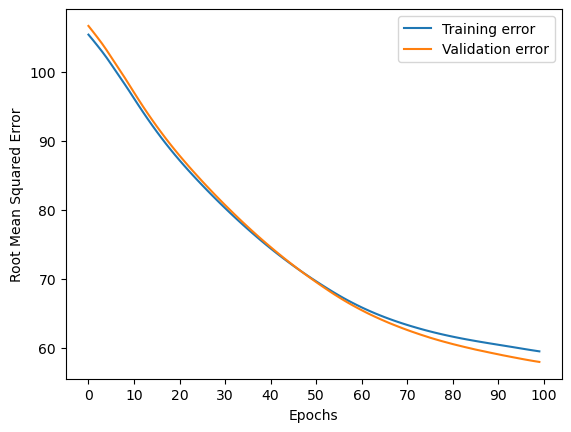

In [29]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(sigmoid_df_root_metrics["rmse"], label = 'Training error')
plt.plot(sigmoid_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [30]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_sigmoid.predict(X_test_scaled)

51/51 [==============================] - 0s 721us/step


In [31]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

MAE: 40.15
MSE: 3414.78
MAPE: 52.77%
RMSE: 58.44


### tanh

In [32]:
# Define hyperbolic tangent (tanh) model
model_tanh = Sequential(
    [Dense(X_train.shape[1], activation="tanh", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [33]:
model_tanh.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [34]:
model_tanh.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_tanh = model_tanh.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 11100.4102 - mae: 74.7358 - mse: 11100.4102 - val_loss: 11349.6074 - val_mae: 77.2578 - val_mse: 11349.6074
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10880.9336 - mae: 73.8588 - mse: 10880.9336 - val_loss: 11086.2324 - val_mae: 76.1823 - val_mse: 11086.2324
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 10607.4248 - mae: 72.6110 - mse: 10607.4248 - val_loss: 10787.3926 - val_mae: 74.7673 - val_mse: 10787.3926
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 10327.4326 - mae: 71.1451 - mse: 10327.4326 - val_loss: 10501.9531 - val_mae: 73.2533 - val_mse: 10501.9531
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 10061.7646 - mae: 69.6395 - mse: 10061.7646 - val_loss: 10231.5742 - val_mae: 71.6959 - val_mse: 10231.5742
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 9807.8027 

163/163 [==============================] - 0s 1ms/step - loss: 5034.9048 - mae: 43.9005 - mse: 5034.9048 - val_loss: 5026.7246 - val_mae: 45.0558 - val_mse: 5026.7246
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 4961.3735 - mae: 43.5379 - mse: 4961.3735 - val_loss: 4948.0264 - val_mae: 44.6203 - val_mse: 4948.0264
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 4890.3145 - mae: 43.1740 - mse: 4890.3145 - val_loss: 4872.1831 - val_mae: 44.2076 - val_mse: 4872.1831
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 4820.7817 - mae: 42.7840 - mse: 4820.7817 - val_loss: 4796.4336 - val_mae: 43.7954 - val_mse: 4796.4336
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 4751.3501 - mae: 42.4129 - mse: 4751.3501 - val_loss: 4722.8579 - val_mae: 43.3753 - val_mse: 4722.8579
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 4680.9722 - mae: 42.0100 - mse: 4680.

163/163 [==============================] - 0s 1ms/step - loss: 2921.1572 - mae: 32.9210 - mse: 2921.1572 - val_loss: 2810.9402 - val_mae: 33.0465 - val_mse: 2810.9402
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2898.6465 - mae: 32.8076 - mse: 2898.6465 - val_loss: 2787.5173 - val_mae: 32.9712 - val_mse: 2787.5173
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2876.5623 - mae: 32.7798 - mse: 2876.5623 - val_loss: 2764.2358 - val_mae: 32.8696 - val_mse: 2764.2358
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2854.8440 - mae: 32.6971 - mse: 2854.8440 - val_loss: 2740.7202 - val_mae: 32.7689 - val_mse: 2740.7202
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2833.5886 - mae: 32.6286 - mse: 2833.5886 - val_loss: 2718.5325 - val_mae: 32.6832 - val_mse: 2718.5325
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2812.4475 - mae: 32.5547 - mse: 2812.

In [36]:
model_tanh.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 51ms/step


array([[  9.263861],
       [ 14.890093],
       [122.4004  ],
       [ 40.993355],
       [ 56.989243],
       [121.147285],
       [ 14.426022],
       [122.78501 ],
       [113.011284],
       [114.16653 ]], dtype=float32)

In [37]:
tanh_df_history = pd.DataFrame(history_tanh.history)
tanh_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11100.410156,74.735794,11100.410156,11349.607422,77.257843,11349.607422
1,10880.933594,73.858833,10880.933594,11086.232422,76.182259,11086.232422
2,10607.424805,72.610985,10607.424805,10787.392578,74.767334,10787.392578
3,10327.432617,71.145111,10327.432617,10501.953125,73.253296,10501.953125
4,10061.764648,69.639542,10061.764648,10231.574219,71.695938,10231.574219
...,...,...,...,...,...,...
95,2812.447510,32.554710,2812.447510,2697.206299,32.579910,2697.206299
96,2792.022949,32.456245,2792.022949,2676.458984,32.508774,2676.458984
97,2771.840576,32.392979,2771.840576,2655.882324,32.389671,2655.882324
98,2752.692139,32.295521,2752.692139,2637.446777,32.354084,2637.446777


In [38]:
tanh_df_root_metrics = tanh_df_history[["mse", "val_mse"]].apply(np.sqrt)
tanh_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
tanh_df_root_metrics

,rmse,val_rmse
0,105.358484,106.534536
1,104.311714,105.291179
2,102.992353,103.862373
3,101.623977,102.479037
4,100.308348,101.151244
...,...,...
95,53.032514,51.934635
96,52.839596,51.734505
97,52.648272,51.535253
98,52.466105,51.356078


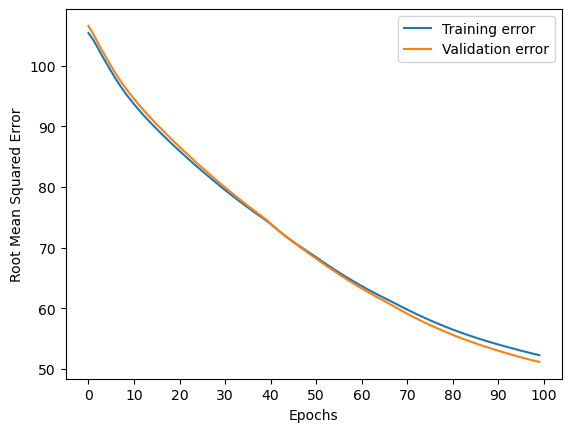

In [39]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(tanh_df_root_metrics["rmse"], label = 'Training error')
plt.plot(tanh_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [40]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_tanh.predict(X_test_scaled)

51/51 [==============================] - 0s 721us/step


In [41]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

MAE: 32.17
MSE: 2601.15
MAPE: 42.28%
RMSE: 51.00


## Impact of number of nodes and number of hidden layers

In [64]:
# Define model with more hidden layers
model_mlayers = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(X_train.shape[1], activation="relu"),
     Dense(X_train.shape[1], activation="relu"),
     Dense(1)])

In [65]:
model_mlayers.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [66]:
model_mlayers.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [67]:
history_mlayers = model_mlayers.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 4ms/step - loss: 10907.0244 - mae: 73.1574 - mse: 10907.0244 - val_loss: 10600.2764 - val_mae: 72.1793 - val_mse: 10600.2764
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 7865.5220 - mae: 59.5277 - mse: 7865.5220 - val_loss: 4994.5791 - val_mae: 49.9945 - val_mse: 4994.5791
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 4219.2778 - mae: 47.3361 - mse: 4219.2778 - val_loss: 3981.1577 - val_mae: 46.2316 - val_mse: 3981.1577
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 3918.7222 - mae: 45.5946 - mse: 3918.7222 - val_loss: 3824.4927 - val_mae: 44.4152 - val_mse: 3824.4927
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 3782.5540 - mae: 44.0275 - mse: 3782.5540 - val_loss: 3683.2327 - val_mae: 43.1118 - val_mse: 3683.2327
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 3648.0708 - mae: 42.6843 -

163/163 [==============================] - 0s 1ms/step - loss: 2253.7642 - mae: 30.6604 - mse: 2253.7642 - val_loss: 2112.9941 - val_mae: 29.7285 - val_mse: 2112.9941
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 2250.6719 - mae: 30.5105 - mse: 2250.6719 - val_loss: 2117.9507 - val_mae: 29.6459 - val_mse: 2117.9507
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 2245.5950 - mae: 30.2966 - mse: 2245.5950 - val_loss: 2115.9543 - val_mae: 30.1729 - val_mse: 2115.9543
Epoch 49/100
163/163 [==============================] - 0s 1ms/step - loss: 2249.4360 - mae: 30.6398 - mse: 2249.4360 - val_loss: 2103.1609 - val_mae: 29.7978 - val_mse: 2103.1609
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 2244.5889 - mae: 30.4467 - mse: 2244.5889 - val_loss: 2101.2361 - val_mae: 29.5962 - val_mse: 2101.2361
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 2244.4636 - mae: 30.4468 - mse: 2244.

163/163 [==============================] - 0s 1ms/step - loss: 2180.1011 - mae: 29.7034 - mse: 2180.1011 - val_loss: 2070.4456 - val_mae: 29.1736 - val_mse: 2070.4456
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2177.8201 - mae: 29.7773 - mse: 2177.8201 - val_loss: 2070.0066 - val_mae: 29.0360 - val_mse: 2070.0066
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2176.6418 - mae: 29.6989 - mse: 2176.6418 - val_loss: 2075.4631 - val_mae: 28.9653 - val_mse: 2075.4631
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2169.8203 - mae: 29.6327 - mse: 2169.8203 - val_loss: 2083.0195 - val_mae: 28.9919 - val_mse: 2083.0195
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2174.3118 - mae: 29.5890 - mse: 2174.3118 - val_loss: 2070.6997 - val_mae: 29.1123 - val_mse: 2070.6997
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2175.7266 - mae: 29.6867 - mse: 2175.

In [68]:
model_mlayers.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 66ms/step


array([[  6.3254056],
       [ 18.388245 ],
       [181.6595   ],
       [ 84.686806 ],
       [ 47.51647  ],
       [118.54447  ],
       [ 11.362764 ],
       [153.65128  ],
       [143.73297  ],
       [116.33654  ]], dtype=float32)

In [69]:
mlayers_df_history = pd.DataFrame(history_mlayers.history)
mlayers_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,10907.024414,73.157425,10907.024414,10600.276367,72.179306,10600.276367
1,7865.521973,59.527710,7865.521973,4994.579102,49.994492,4994.579102
2,4219.277832,47.336063,4219.277832,3981.157715,46.231609,3981.157715
3,3918.722168,45.594646,3918.722168,3824.492676,44.415188,3824.492676
4,3782.553955,44.027489,3782.553955,3683.232666,43.111759,3683.232666
...,...,...,...,...,...,...
95,2175.726562,29.686668,2175.726562,2070.241943,29.050133,2070.241943
96,2166.042969,29.595400,2166.042969,2072.701660,28.949924,2072.701660
97,2172.642334,29.515736,2172.642334,2071.169922,29.036974,2071.169922
98,2169.921631,29.600431,2169.921631,2068.994629,28.927683,2068.994629


In [70]:
mlayers_df_root_metrics = mlayers_df_history[["mse", "val_mse"]].apply(np.sqrt)
mlayers_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
mlayers_df_root_metrics

,rmse,val_rmse
0,104.436701,102.957644
1,88.687778,70.672336
2,64.955968,63.096416
3,62.599698,61.842483
4,61.502471,60.689642
...,...,...
95,46.644684,45.499911
96,46.540767,45.526933
97,46.611612,45.510108
98,46.582418,45.486203


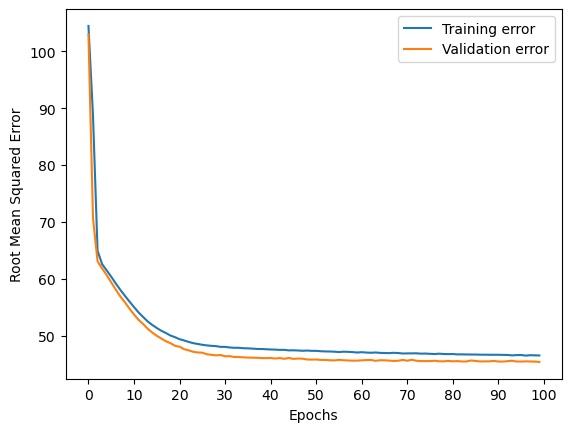

In [71]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(mlayers_df_root_metrics["rmse"], label = 'Training error')
plt.plot(mlayers_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [72]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_mlayers.predict(X_test_scaled)

51/51 [==============================] - 0s 761us/step


In [73]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

MAE: 29.54
MSE: 2096.08
MAPE: 38.82%
RMSE: 45.78


## More nodes

In [144]:
# Define model with more nodes in hidden layer
model_mnodes = Sequential(
    [Dense(X_train.shape[1]*2, activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

#best performance war *12 => ~42% MAPE
# There are a few possible reasons why increasing the number of nodes in a single hidden layer of a neural network might lead to worse performance:

# Overfitting: Having more nodes in a single layer can lead to the model fitting the training data too closely, and not generalizing well to new data.
# Vanishing gradients: If the activation function used in the hidden layer has a small derivative, as the number of nodes increases, the gradients may become very small, making it difficult for the model to learn.
# Computational complexity: Larger networks can be more computationally expensive to train, and may require more data to avoid overfitting.
# It's possible that more nodes in the single hidden layer caused the model to overfit the training data, leading to poor generalization performance on the test data.

In [145]:
model_mnodes.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [146]:
model_mnodes.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                144       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [147]:
history_mnodes = model_mnodes.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/100
163/163 [==============================] - 1s 2ms/step - loss: 11074.3916 - mae: 74.5627 - mse: 11074.3916 - val_loss: 11245.8535 - val_mae: 76.4578 - val_mse: 11245.8535
Epoch 2/100
163/163 [==============================] - 0s 1ms/step - loss: 10647.6064 - mae: 72.2220 - mse: 10647.6064 - val_loss: 10644.6602 - val_mae: 73.4639 - val_mse: 10644.6602
Epoch 3/100
163/163 [==============================] - 0s 1ms/step - loss: 9906.8867 - mae: 68.5730 - mse: 9906.8867 - val_loss: 9705.5557 - val_mae: 69.0240 - val_mse: 9705.5557
Epoch 4/100
163/163 [==============================] - 0s 1ms/step - loss: 8871.4707 - mae: 63.6350 - mse: 8871.4707 - val_loss: 8509.7109 - val_mae: 63.4786 - val_mse: 8509.7109
Epoch 5/100
163/163 [==============================] - 0s 1ms/step - loss: 7691.5791 - mae: 58.1612 - mse: 7691.5791 - val_loss: 7282.5425 - val_mae: 57.9646 - val_mse: 7282.5425
Epoch 6/100
163/163 [==============================] - 0s 1ms/step - loss: 6586.2974 - mae: 53.25

163/163 [==============================] - 0s 2ms/step - loss: 2808.9026 - mae: 36.7172 - mse: 2808.9026 - val_loss: 2723.0310 - val_mae: 36.2057 - val_mse: 2723.0310
Epoch 47/100
163/163 [==============================] - 0s 1ms/step - loss: 2790.8223 - mae: 36.6309 - mse: 2790.8223 - val_loss: 2704.7957 - val_mae: 36.0756 - val_mse: 2704.7957
Epoch 48/100
163/163 [==============================] - 0s 1ms/step - loss: 2773.9524 - mae: 36.6567 - mse: 2773.9524 - val_loss: 2689.1248 - val_mae: 35.9129 - val_mse: 2689.1248
Epoch 49/100
163/163 [==============================] - 0s 2ms/step - loss: 2758.6914 - mae: 36.4568 - mse: 2758.6914 - val_loss: 2673.8381 - val_mae: 35.8039 - val_mse: 2673.8381
Epoch 50/100
163/163 [==============================] - 0s 1ms/step - loss: 2742.8208 - mae: 36.2442 - mse: 2742.8208 - val_loss: 2658.9314 - val_mae: 35.8166 - val_mse: 2658.9314
Epoch 51/100
163/163 [==============================] - 0s 1ms/step - loss: 2728.9236 - mae: 36.2023 - mse: 2728.

163/163 [==============================] - 0s 1ms/step - loss: 2366.8645 - mae: 33.7025 - mse: 2366.8645 - val_loss: 2291.2017 - val_mae: 33.1989 - val_mse: 2291.2017
Epoch 92/100
163/163 [==============================] - 0s 1ms/step - loss: 2360.5454 - mae: 33.6214 - mse: 2360.5454 - val_loss: 2284.6541 - val_mae: 33.2070 - val_mse: 2284.6541
Epoch 93/100
163/163 [==============================] - 0s 1ms/step - loss: 2355.1707 - mae: 33.6211 - mse: 2355.1707 - val_loss: 2278.8757 - val_mae: 33.1071 - val_mse: 2278.8757
Epoch 94/100
163/163 [==============================] - 0s 1ms/step - loss: 2349.2383 - mae: 33.5057 - mse: 2349.2383 - val_loss: 2273.7578 - val_mae: 33.0212 - val_mse: 2273.7578
Epoch 95/100
163/163 [==============================] - 0s 1ms/step - loss: 2343.6619 - mae: 33.4201 - mse: 2343.6619 - val_loss: 2268.8694 - val_mae: 32.9694 - val_mse: 2268.8694
Epoch 96/100
163/163 [==============================] - 0s 1ms/step - loss: 2338.6360 - mae: 33.4281 - mse: 2338.

In [148]:
model_mnodes.predict(X_train_scaled[:10])

1/1 [==============================] - 0s 50ms/step


array([[-16.452238 ],
       [  1.1017778],
       [179.7257   ],
       [ 99.70113  ],
       [ 58.686676 ],
       [151.14032  ],
       [ 12.742592 ],
       [112.79427  ],
       [101.55131  ],
       [133.16324  ]], dtype=float32)

In [149]:
mnodes_df_history = pd.DataFrame(history_mnodes.history)
mnodes_df_history

,loss,mae,mse,val_loss,val_mae,val_mse
0,11074.391602,74.562744,11074.391602,11245.853516,76.457840,11245.853516
1,10647.606445,72.222008,10647.606445,10644.660156,73.463921,10644.660156
2,9906.886719,68.572975,9906.886719,9705.555664,69.024010,9705.555664
3,8871.470703,63.635014,8871.470703,8509.710938,63.478565,8509.710938
4,7691.579102,58.161171,7691.579102,7282.542480,57.964615,7282.542480
...,...,...,...,...,...,...
95,2338.635986,33.428059,2338.635986,2262.854004,32.945675,2262.854004
96,2333.896729,33.381943,2333.896729,2257.208496,32.940208,2257.208496
97,2328.759766,33.262840,2328.759766,2252.737305,32.957123,2252.737305
98,2324.323242,33.477093,2324.323242,2247.254883,32.817829,2247.254883


In [150]:
mnodes_df_root_metrics = mnodes_df_history[["mse", "val_mse"]].apply(np.sqrt)
mnodes_df_root_metrics.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
mnodes_df_root_metrics

,rmse,val_rmse
0,105.234935,106.046469
1,103.187240,103.172962
2,99.533345,98.516779
3,94.188485,92.248094
4,87.701648,85.337814
...,...,...
95,48.359446,47.569465
96,48.310420,47.510088
97,48.257225,47.463010
98,48.211236,47.405220


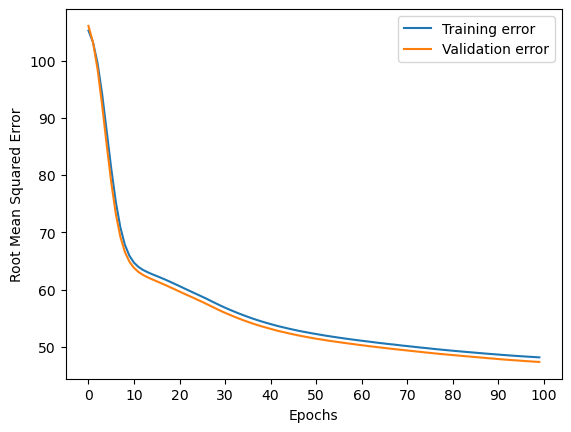

In [151]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(mnodes_df_root_metrics["rmse"], label = 'Training error')
plt.plot(mnodes_df_root_metrics["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
# plt.xticks(range(2,10))
plt.xticks(np.arange(0, 100+1, 10.0))
plt.legend()

plt.show()

In [152]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model_mnodes.predict(X_test_scaled)

51/51 [==============================] - 0s 731us/step


In [153]:
# Report regression performance on test set
# To-Do: look at metrics again

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
# print(f"R^2: { r2_score(y_test, y_pred):.2f}")

MAE: 33.39
MSE: 2183.68
MAPE: 43.89%
RMSE: 46.73


### To DO: Tuning neural network topology : https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

## Gridsearch for optimal hyper-parameters

In [154]:
gs_model = Sequential(
    [Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1]]),
     Dense(1)])

In [155]:
gs_model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [161]:
parameters = { 
    "activation": ["relu", "tanh"],
    "n_hidden_layers": [1, 2, 4],
    "n_hidden_nodes": [1, X_train.shape[1], X_train.shape[1] * 2, X_train.shape[1] * 4],
    'epochs': [100,150]}

In [163]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

regressor = KerasRegressor(gs_model)

#What hyperparameter we want to play with



regressorGS = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           cv = 3)



In [164]:
regressorGS = regressorGS.fit(X_train, y_train)

INFO:tensorflow:Assets written to: ram://a20b840f-e07f-4e3a-ae49-9d74add9d1b6/assets


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://adcb352f-6767-485e-a76c-6d1089097435/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [ ]:
regressorGS.best_score_

In [ ]:
regressorGS.best_params_